<a href="https://colab.research.google.com/github/Aman95495/Beijing-Air-Quality-Forecasting-Project/blob/main/Forecasting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FORECASTING

In [ ]:
# DATASET - LSTM-Multivariate_pollution.csv

In [ ]:
import pandas as pd

df = pd.read_csv('/content/LSTM-Multivariate_pollution.csv')
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
df.shape

(43800, 9)

In [ ]:
df.size

394200

In [ ]:
df.isnull().sum()

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [ ]:
# size of the data is very large i.e 43800 so let make it small.
df = df[0::24]
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
24,2010-01-03 00:00:00,90.0,-7,-6.0,1027.0,SE,58.56,4,0
48,2010-01-04 00:00:00,79.0,-14,-12.0,1023.0,NW,16.09,0,0
72,2010-01-05 00:00:00,30.0,-26,-17.0,1035.0,NW,201.58,0,0
96,2010-01-06 00:00:00,56.0,-25,-17.0,1033.0,NW,26.83,0,0
...,...,...,...,...,...,...,...,...,...
43680,2014-12-27 00:00:00,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43704,2014-12-28 00:00:00,385.0,-9,-6.0,1025.0,cv,6.69,0,0
43728,2014-12-29 00:00:00,362.0,-10,-4.0,1016.0,cv,4.01,0,0
43752,2014-12-30 00:00:00,189.0,-12,-2.0,1016.0,cv,0.89,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 43776
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1825 non-null   object 
 1   pollution  1825 non-null   float64
 2   dew        1825 non-null   int64  
 3   temp       1825 non-null   float64
 4   press      1825 non-null   float64
 5   wnd_dir    1825 non-null   object 
 6   wnd_spd    1825 non-null   float64
 7   snow       1825 non-null   int64  
 8   rain       1825 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 128.4+ KB


In [ ]:
# Changing name of innput and output column.

df.rename(columns = {'date':'ds','pollution':'y'},inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
24,2010-01-03 00:00:00,90.0,-7,-6.0,1027.0,SE,58.56,4,0
48,2010-01-04 00:00:00,79.0,-14,-12.0,1023.0,NW,16.09,0,0
72,2010-01-05 00:00:00,30.0,-26,-17.0,1035.0,NW,201.58,0,0
96,2010-01-06 00:00:00,56.0,-25,-17.0,1033.0,NW,26.83,0,0
...,...,...,...,...,...,...,...,...,...
43680,2014-12-27 00:00:00,163.0,-10,-5.0,1030.0,NW,1.79,0,0
43704,2014-12-28 00:00:00,385.0,-9,-6.0,1025.0,cv,6.69,0,0
43728,2014-12-29 00:00:00,362.0,-10,-4.0,1016.0,cv,4.01,0,0
43752,2014-12-30 00:00:00,189.0,-12,-2.0,1016.0,cv,0.89,0,0


In [ ]:
# Creating New Dataframe

df_new = df[['ds','y']]
df_new


,ds,y
0,2010-01-02 00:00:00,129.0
24,2010-01-03 00:00:00,90.0
48,2010-01-04 00:00:00,79.0
72,2010-01-05 00:00:00,30.0
96,2010-01-06 00:00:00,56.0
...,...,...
43680,2014-12-27 00:00:00,163.0
43704,2014-12-28 00:00:00,385.0
43728,2014-12-29 00:00:00,362.0
43752,2014-12-30 00:00:00,189.0


In [ ]:
df_new.shape

(1825, 2)

In [ ]:
df_new.size

3650

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 43776
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1825 non-null   object 
 1   y       1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [ ]:
# Changing the datatypes of ds column as y is in correct format.

df_new['ds'] = pd.to_datetime(df_new['ds'])

<ipython-input-49-b1d1ff17d9b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ds'] = pd.to_datetime(df_new['ds'])


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 43776
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1825 non-null   datetime64[ns]
 1   y       1825 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.6 KB


Text(0.5, 1.0, 'Pollution Data of US embassy in Beijing, China')

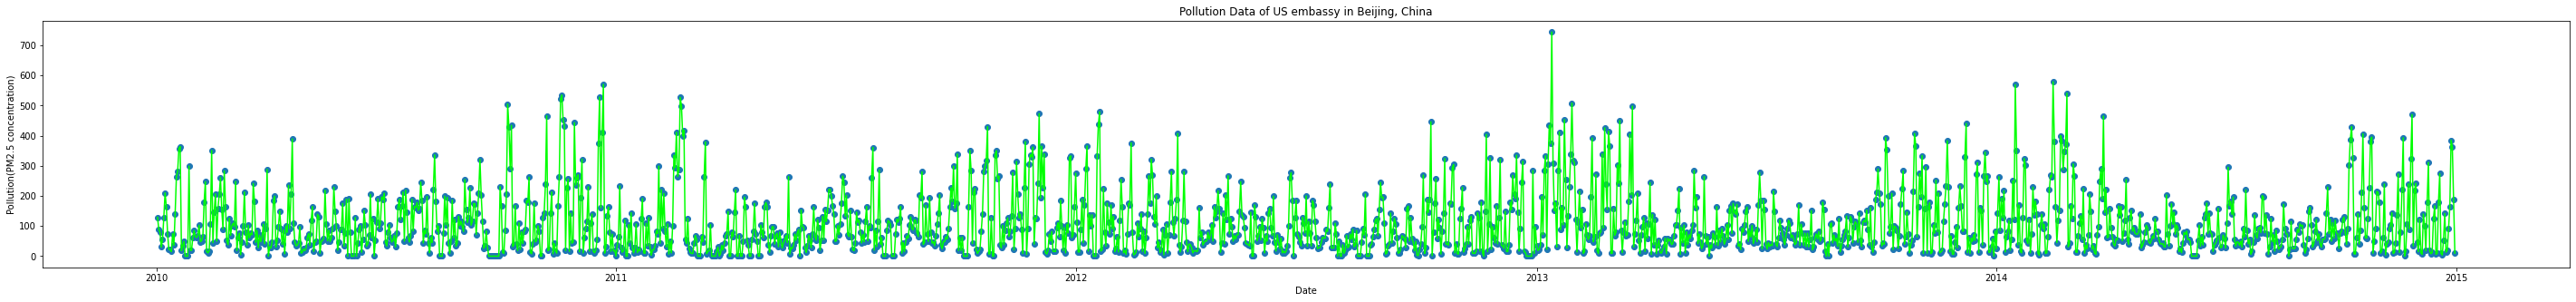

In [ ]:
# Vizualization

import matplotlib.pyplot as plt
plt.figure(figsize=(50,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.plot(df_new['ds'],df_new['y'],color="lime")
plt.xlabel('Date')
plt.ylabel('Pollution(PM2.5 concentration)')
plt.title('Pollution Data of US embassy in Beijing, China')

In [ ]:
# FB Prophet

import prophet

obj = prophet.Prophet()

In [ ]:
obj.fit(df_new)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfs7vjqm0/b1jemvn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfs7vjqm0/buji8iqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79567', 'data', 'file=/tmp/tmpfs7vjqm0/b1jemvn7.json', 'init=/tmp/tmpfs7vjqm0/buji8iqi.json', 'output', 'file=/tmp/tmpfs7vjqm0/prophet_modelc5z5eo2n/prophet_model-20230210060153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = obj.make_future_dataframe(periods = 365 , freq = 'D')
forecast = obj.predict(forecast)

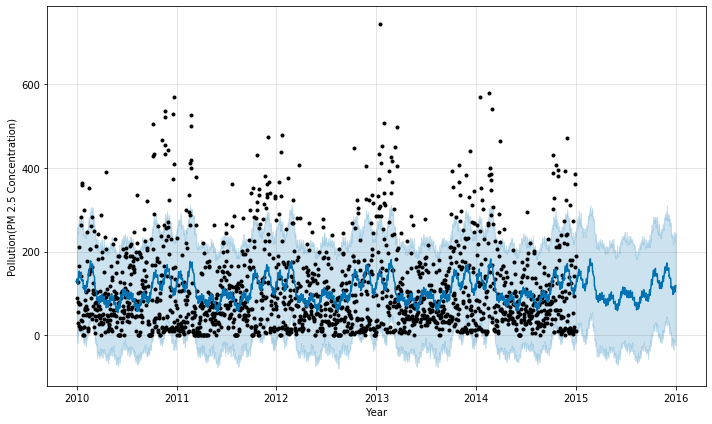

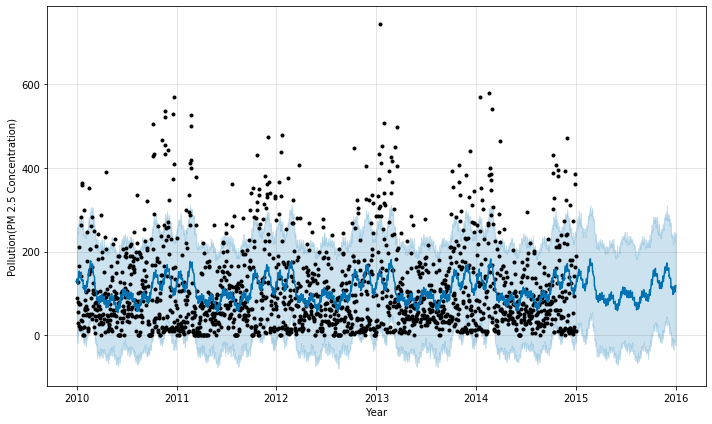

In [ ]:
# Final Vizualization.

obj.plot(forecast,xlabel = ' Year ',ylabel = 'Pollution(PM 2.5 Concentration)')

# Here Dark Blue line is the best fit line.
# Light Blue Shade is the min and max value predicted by the model.
# Black Dots are the actual PM2.5 concentration (from 2010-01-02 to 2014-12-31).